
## Data Dictionary: #

    Pregnancies: Number of times pregnant.

    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

    BloodPressure: Diastolic blood pressure (mm Hg).

    SkinThickness: Triceps skin fold thickness (mm).

    Insulin: 2-Hour serum insulin (mu U/ml).

    BMI: Body mass index (weight in kg/(height in m)^2).

    DiabetesPedigreeFunction: Diabetes pedigree function.

    Age: Age (years).

    Outcome: Class variable (0 or 1), Class Distribution: (class value 1 is interpreted as "tested positive for diabetes").


Guide on inspection of the dataset

    Verify if there are Null / Nan Values

    Is it a Balanced or Imbalanced Dataset?

    Convert non numerical data to numerical

    Find correlation - feature importance

    Get some Statistics - mean,median,25%,50%,75%,count , min,max on coloum wise

    Eliminate outliers with IQR Method


### tuve que correr aquí el pip install de requirements.txt porque no me los toma desde la consola

In [143]:
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install seaborn
!pip install folium
!pip install statsmodels
!pip install plotly
!pip install DecisionTreeClassifier
!pip install pickle


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement DecisionTreeClassifier (from versions: none)
ERROR: No matching distribution found for DecisionTreeClassifier

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To up

In [144]:
pip install -r ../requirements.txt

  Using cached SQLAlchemy-1.4.37-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
  Using cached PyMySQL-1.0.2-py3-none-any.whl (43 kB)
  Using cached python_dotenv-0.20.0-py3-none-any.whl (17 kB)
  Using cached psycopg2_binary-2.9.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.9 MB)
  Using cached ipyleaflet-0.17.0-py2.py3-none-any.whl (3.3 MB)
  Using cached sympy-1.10.1-py3-none-any.whl (6.4 MB)
ERROR: Could not find a version that satisfies the requirement DecisionTreeClassifier (from versions: none)
ERROR: No matching distribution found for DecisionTreeClassifier

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [145]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.graph_objects as go
#import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pickle
#from folium.plugins import MarkerCluster
#from folium import plugins
#from folium.plugins import FastMarkerCluster
#from folium.plugins import HeatMap


In [146]:
#Step 1:

In [147]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df_raw = pd.read_csv(url, header=0, sep=",")


Explore

In [148]:
df_raw.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [149]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [150]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


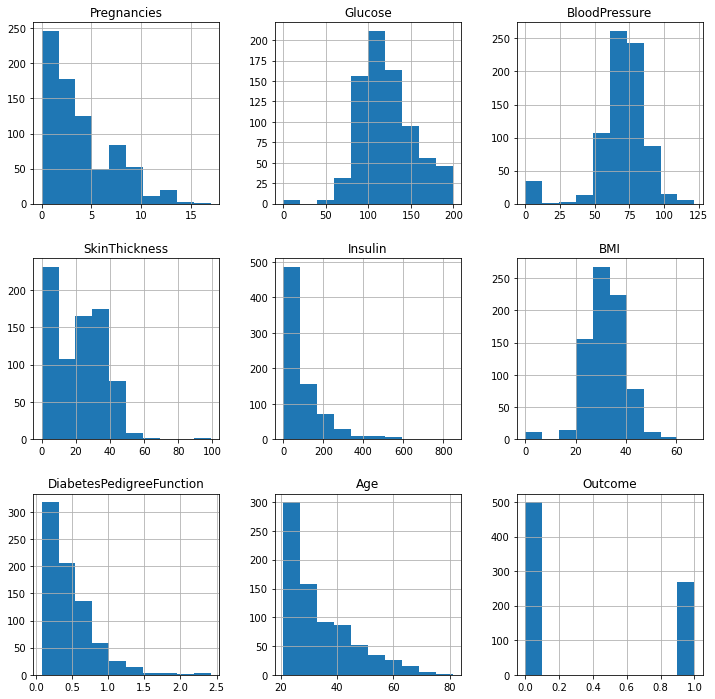

In [151]:
df_raw.hist(figsize=(12,12))
plt.show()

In [152]:
df_raw.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
703,2,129,0,0,0,38.5,0.304,41,0
643,4,90,0,0,0,28.0,0.610,31,0
475,0,137,84,27,0,27.3,0.231,59,0
405,2,123,48,32,165,42.1,0.520,26,0
530,2,122,60,18,106,29.8,0.717,22,0


In [153]:
df_raw["Outcome"].value_counts()



0    500
1    268
Name: Outcome, dtype: int64

This dataset is ambalanced

### See more about features

In [154]:
df_raw[df_raw['Pregnancies']==0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
16,0,118,84,47,230,45.8,0.551,31,1
45,0,180,66,39,0,42.0,1.893,25,1
57,0,100,88,60,110,46.8,0.962,31,0
58,0,146,82,0,0,40.5,1.781,44,0
...,...,...,...,...,...,...,...,...,...
713,0,134,58,20,291,26.4,0.352,21,0
727,0,141,84,26,0,32.4,0.433,22,0
736,0,126,86,27,120,27.4,0.515,21,0
753,0,181,88,44,510,43.3,0.222,26,1


In [155]:
len(df_raw[df_raw['BloodPressure']==0])


35

In [156]:
len(df_raw[df_raw['Insulin']==0])


374

In [157]:
df_raw['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [158]:
df_raw['Insulin'].value_counts()


0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [159]:
len(df_raw[df_raw['BMI']==0])


11

### Clean the  DataSet

In [160]:

#insulina
df_0=df_raw[(df_raw['Outcome']==0) & (df_raw["Insulin"] > 0)]
insuline_mean_0=df_0['Insulin'].mean()

df_no0=df_raw[(df_raw['Outcome']!=0) & (df_raw["Insulin"] > 0)]
insuline_mean_no0=df_no0['Insulin'].mean()

In [161]:
def insulina(insulin_value, outcome_value, insuline_mean_0,insuline_mean_no0):
    if outcome_value==0 and insulin_value==0:
        return insuline_mean_0
    elif outcome_value==1 and insulin_value==0:
        return insuline_mean_no0
    else:
        return insulin_value

In [162]:
df_raw['Insulin'] = df_raw.apply(lambda x: insulina(x['Insulin'], x['Outcome'],insuline_mean_0,insuline_mean_no0), axis=1)

In [163]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,157.003527,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,88.860914,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,130.287879,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,206.846154,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [164]:

#bmi
df_0=df_raw[(df_raw['Outcome']==0) & (df_raw["BMI"] > 0)]
bmi_mean_0=df_0['BMI'].mean()

df_no0=df_raw[(df_raw['Outcome']!=0) & (df_raw["BMI"] > 0)]
bmi_mean_no0=df_no0['BMI'].mean()

def BMI_fun(bmi_value, outcome_value, bmi_mean_0,bmi_mean_no0):
    if outcome_value==0 and bmi_value==0:
        return bmi_mean_0
    elif outcome_value==1 and bmi_value==0:
        return bmi_mean_no0
    else:
        return bmi_value

In [165]:
df_raw['BMI'] = df_raw.apply(lambda x: BMI_fun(x['BMI'], x['Outcome'],bmi_mean_0,bmi_mean_no0), axis=1)

In [166]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [167]:

#Glucose
df_0=df_raw[(df_raw['Outcome']==0) & (df_raw["Glucose"] > 0)]
glucose_mean_0=df_0['Glucose'].mean()

df_no0=df_raw[(df_raw['Outcome']!=0) & (df_raw["Glucose"] > 0)]
glucose_mean_no0=df_no0['Glucose'].mean()

def glucose_fun(glucose_value, outcome_value, glucose_mean_0,glucose_mean_no0):
    if outcome_value==0 and glucose_value==0:
        return glucose_mean_0
    elif outcome_value==1 and glucose_value==0:
        return glucose_mean_no0
    else:
        return glucose_value

In [168]:
df_raw['Glucose'] = df_raw.apply(lambda x: glucose_fun(x['Glucose'], x['Outcome'],glucose_mean_0,glucose_mean_no0), axis=1)

In [169]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,69.105469,20.536458,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,19.355807,15.952218,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,0.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,0.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [170]:

#BloodPressure
df_0=df_raw[(df_raw['Outcome']==0) & (df_raw["BloodPressure"] > 0)]
BloodPressure_mean_0=df_0['BloodPressure'].mean()

df_no0=df_raw[(df_raw['Outcome']!=0) & (df_raw["BloodPressure"] > 0)]
BloodPressure_mean_no0=df_no0['BloodPressure'].mean()

def BloodPressure_fun(BloodPressure_value, outcome_value, BloodPressure_mean_0,BloodPressure_mean_no0):
    if outcome_value==0 and BloodPressure_value==0:
        return BloodPressure_mean_0
    elif outcome_value==1 and BloodPressure_value==0:
        return BloodPressure_mean_no0
    else:
        return BloodPressure_value

In [171]:
df_raw['BloodPressure'] = df_raw.apply(lambda x: BloodPressure_fun(x['BloodPressure'], x['Outcome'],BloodPressure_mean_0,BloodPressure_mean_no0), axis=1)

In [172]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,20.536458,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,15.952218,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [173]:

#SkinThickness
df_0=df_raw[(df_raw['Outcome']==0) & (df_raw["SkinThickness"] > 0)]
SkinThickness_mean_0=df_0['SkinThickness'].mean()

df_no0=df_raw[(df_raw['Outcome']!=0) & (df_raw["SkinThickness"] > 0)]
SkinThickness_mean_no0=df_no0['SkinThickness'].mean()

def SkinThickness_fun(SkinThickness_value, outcome_value, SkinThickness_mean_0,SkinThickness_mean_no0):
    if outcome_value==0 and SkinThickness_value==0:
        return SkinThickness_mean_0
    elif outcome_value==1 and SkinThickness_value==0:
        return SkinThickness_mean_no0
    else:
        return SkinThickness_value

In [174]:
df_raw['SkinThickness'] = df_raw.apply(lambda x: SkinThickness_fun(x['SkinThickness'], x['Outcome'],SkinThickness_mean_0,SkinThickness_mean_no0), axis=1)

In [175]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [176]:

#Genérico, en los pasos anteriores se fue haciendo uno a uno
#if value =0 and diabetic, set the mean of diabetic, else if value=0 and not diabeti, set the mean of not diabetic, 
# rest of the case use the data value

"""def set_value (data_value, outcome_value,mean_nodiab,mean_diab):
    if (outcome_value == 0 and data_value==0):
        return mean_nodiab
    elif (outcome_value ==1 and data_value ==0):
        return mean_diab
    else:
        return data_value

def set_use_mean (name_col):
    #calc the mean for diabetic and not diabetic that the data is not 0
    meanNoDiab = df_raw[(df_raw[name_col]>0) & (df_raw['Outcome']==0)][name_col].mean()
    meanDiab = df_raw[(df_raw[name_col]>0) & (df_raw['Outcome']==1)][name_col].mean()

    df_raw[name_col] = df_raw.apply(lambda x: set_value(x[name_col], x['Outcome'],meanNoDiab,meanDiab), axis=1)

set_use_mean('Insulin')
set_use_mean('Glucose')
set_use_mean('BloodPressure')
set_use_mean('SkinThickness')
set_use_mean('BMI')"""

"def set_value (data_value, outcome_value,mean_nodiab,mean_diab):\n    if (outcome_value == 0 and data_value==0):\n        return mean_nodiab\n    elif (outcome_value ==1 and data_value ==0):\n        return mean_diab\n    else:\n        return data_value\n\ndef set_use_mean (name_col):\n    #calc the mean for diabetic and not diabetic that the data is not 0\n    meanNoDiab = df_raw[(df_raw[name_col]>0) & (df_raw['Outcome']==0)][name_col].mean()\n    meanDiab = df_raw[(df_raw[name_col]>0) & (df_raw['Outcome']==1)][name_col].mean()\n\n    df_raw[name_col] = df_raw.apply(lambda x: set_value(x[name_col], x['Outcome'],meanNoDiab,meanDiab), axis=1)\n\nset_use_mean('Insulin')\nset_use_mean('Glucose')\nset_use_mean('BloodPressure')\nset_use_mean('SkinThickness')\nset_use_mean('BMI')"

Study Correlation, find them

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129867       0.208935       0.094172   
Glucose                      0.129867  1.000000       0.224356       0.235040   
BloodPressure                0.208935  0.224356       1.000000       0.203453   
SkinThickness                0.094172  0.235040       0.203453       1.000000   
Insulin                      0.093546  0.497789       0.099996       0.212573   
BMI                          0.024127  0.235253       0.286518       0.565443   
DiabetesPedigreeFunction    -0.033523  0.138125      -0.002264       0.102426   
Age                          0.544341  0.268566       0.324439       0.135916   
Outcome                      0.221898  0.495954       0.175087       0.308094   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.093546  0.024127                 -0.033523   
Glucose                   0.497789  0.235

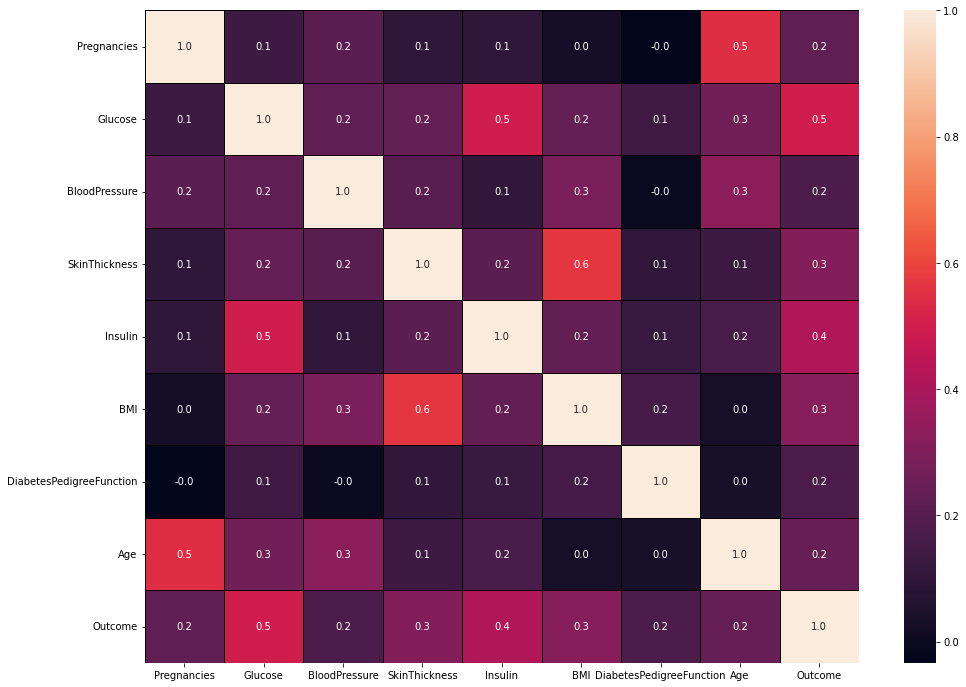

In [177]:
print(df_raw.corr())
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_raw.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

Exist a correlation: Age-Pregnacies


In [178]:
### sns.pairplot(df_raw)
### no se puede usar porque tiene duplicates labels

Resample the data to make a more balanced dataset

In [179]:
from sklearn.utils import resample
df_majority = df_raw[(df_raw["Outcome"]==0)]
df_minority = df_raw[(df_raw["Outcome"]==1)]
df_minority_upsampled = resample(df_minority,replace=True,n_samples=500,random_state=42)
df_raw = pd.concat([df_minority_upsampled,df_majority])
df_raw["Outcome"].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [180]:
df_raw.describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4.191000,124.947890,73.365705,30.047729,168.625093,32.805051,0.476622,34.273000,0.50000
std,3.566685,29.735108,11.976395,8.466625,89.528777,6.768389,0.327363,11.623751,0.50025
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.00000
25%,1.000000,103.000000,66.000000,27.000000,130.287879,28.000000,0.246750,25.000000,0.00000
50%,3.000000,122.000000,74.000000,31.000000,145.000000,32.400000,0.370000,31.000000,0.50000
75%,7.000000,144.000000,80.000000,33.000000,206.846154,36.600000,0.645250,42.000000,1.00000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000,1.00000


Eliminating Outliers with IQR Method

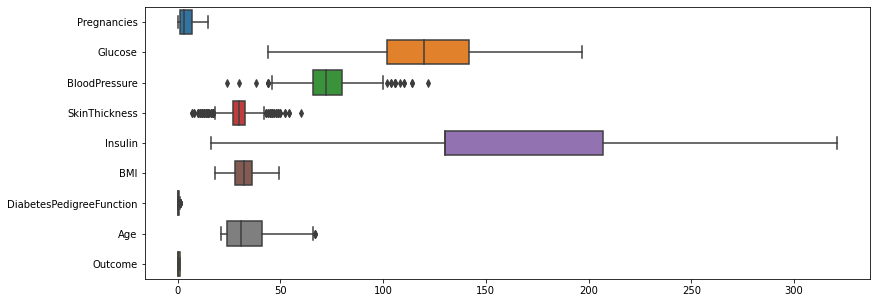

In [181]:
q1 = df_raw['Insulin'].quantile(0.25)
q3 = df_raw['Insulin'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

df_raw = df_raw[(df_raw['Insulin'] > lower_limit) & (df_raw['Insulin'] < upper_limit)]

q1 = df_raw['Age'].quantile(0.25)
q3 = df_raw['Age'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

df_raw = df_raw[(df_raw['Age'] > lower_limit) & (df_raw['Age'] < upper_limit)]

q1 = df_raw['Glucose'].quantile(0.25)
q3 = df_raw['Glucose'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

df_raw = df_raw[(df_raw['Glucose'] > lower_limit) & (df_raw['Glucose'] < upper_limit)]

q1 = df_raw['BMI'].quantile(0.25)
q3 = df_raw['BMI'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

df_raw = df_raw[(df_raw['BMI'] > lower_limit) & (df_raw['BMI'] < upper_limit)]

q1 = df_raw['Pregnancies'].quantile(0.25)
q3 = df_raw['Pregnancies'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

df_raw = df_raw[(df_raw['Pregnancies'] > lower_limit) & (df_raw['Pregnancies'] < upper_limit)]

q1 = df_raw['DiabetesPedigreeFunction'].quantile(0.25)
q3 = df_raw['DiabetesPedigreeFunction'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

df_raw = df_raw[(df_raw['DiabetesPedigreeFunction'] > lower_limit) & (df_raw['DiabetesPedigreeFunction'] < upper_limit)]
plt.figure(figsize=(13,5))
sns.boxplot(data=df_raw,orient='h')
plt.show()

 Separate features from target



In [182]:
X=df_raw.drop('Outcome',axis='columns')
Y=df_raw["Outcome"]

Scale the features

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)


array([[-0.60658295,  0.78725096,  0.18660615, ..., -0.78990628,
        -0.7577477 , -0.52483659],
       [ 0.81579347,  1.30222902,  1.0972518 , ..., -0.31917233,
        -1.0419684 ,  1.20266982],
       [ 0.2468429 ,  1.19923341,  0.9266961 , ...,  1.14172613,
        -0.17035824, -0.4339152 ],
       ...,
       [-0.60658295, -0.03671394, -0.26719385, ...,  0.7196888 ,
        -0.37878675, -0.61575798],
       [ 0.2468429 , -0.07104581, -0.09663815, ..., -1.00092495,
        -0.73879965, -0.34299381],
       [-0.89105823, -1.0323382 , -0.26719385, ..., -0.31917233,
        -0.47352699, -0.97944354]])

 Split the data

In [184]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)


### Modeling with Decision Tree

Fit the data

In [185]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

Get the score of train data just to verify its 1.

In [186]:
model.score(X_train,Y_train)

1.0

Get the score of your predictions

In [187]:
model.score(X_test,Y_test)

0.914179104477612

Get the confusion matrix

[[123  15]
 [  8 122]]


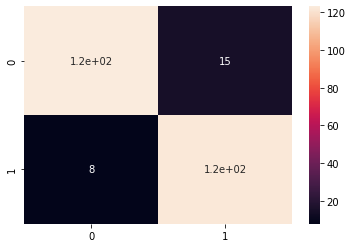

In [188]:
print(confusion_matrix(Y_test,model.predict(X_test)))
sns.heatmap(confusion_matrix(Y_test,model.predict(X_test)), annot=True)
plt.show()



Print the classification report

In [189]:
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       138
           1       0.89      0.94      0.91       130

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.92      0.91      0.91       268



Print feature importance

In [190]:
print(model.feature_importances_)

[0.01285869 0.10988903 0.02567543 0.07437527 0.65402744 0.03303936
 0.01833857 0.07179621]


Get the number of leaves

In [191]:
print(model.get_n_leaves())

45


 Get your tree params

In [192]:
print(model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Get your tree depth

In [193]:
print(model.get_depth())

9


*Train Decision tree with entropy criterion*

In [194]:
dt_model = DecisionTreeClassifier(criterion="entropy")
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [195]:
dt_model.score(X_train,Y_train)

1.0

In [196]:
print(confusion_matrix(Y_test,dt_model.predict(X_test)))

[[124  14]
 [  2 128]]


In [197]:
print(classification_report(Y_test, dt_model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.98      0.90      0.94       138
           1       0.90      0.98      0.94       130

    accuracy                           0.94       268
   macro avg       0.94      0.94      0.94       268
weighted avg       0.94      0.94      0.94       268



In [198]:
print(accuracy_score(Y_test,dt_model.predict(X_test)))


0.9402985074626866


In [199]:
print(dt_model.feature_importances_)


[0.05232082 0.08980227 0.03649277 0.09550081 0.61461663 0.03967569
 0.00650748 0.06508353]


In [200]:
print(dt_model.get_n_leaves())

47


In [201]:
print(dt_model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [202]:
print(dt_model.get_depth())


10


*Tune your decision tree hyperparameters using GridSearch*

In [203]:
#Using Grid Search to get best hyperparameters

from sklearn.model_selection import GridSearchCV
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'min_samples_split': [2, 3, 4]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train,Y_train)
print(clf.best_params_)
print(clf.best_estimator_)

{'criterion': 'entropy', 'max_depth': 70, 'min_samples_split': 3}
DecisionTreeClassifier(criterion='entropy', max_depth=70, min_samples_split=3)


*Once you train your model with your tuned hyperparameters, use the roc_auc_curve to measure your results*

# Train with the best hyperparameters

#COMO SE HACE?

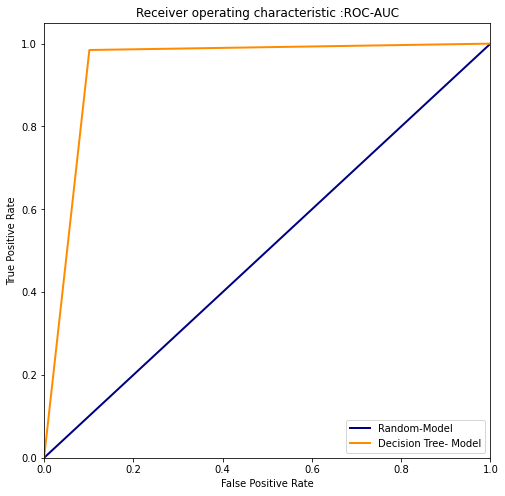

Computed Area Under the Curve (AUC) 0.9415830546265329


In [204]:
#Measure your results

from sklearn.metrics import roc_curve,auc
fpr,tpr, thresholds = roc_curve(Y_test,dt_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,8))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0,1],[0,1],color="navy",lw=2,label="Random-Model")
plt.plot(fpr,tpr,color="darkorange",lw=2, label="Decision Tree- Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic :ROC-AUC")
plt.legend()
plt.show()
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr))

Save the model using pickle

## Otras formas vistas en clase

In [205]:
#exclude pregnancy to feature model
X = df_raw[list(df_raw.columns[1:8])]
y = df_raw[['Outcome']]

In [206]:

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=34)


Note:

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [207]:
#create a tree model, with basic parameter. max-depth=5
clf = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=5)

clf.fit(X_train, y_train)
print('Accuracy:',clf.score(X_test, y_test))




Accuracy: 0.9192825112107623


In [208]:
#show predicted dataset
clf_pred=clf.predict(X_test)

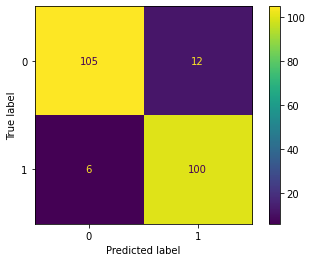

In [209]:
cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

plt.show()

In [210]:
#Importance of feature in the Decision Tree

# tree.feature_importances_ es un vector con la importancia estimada de cada atributo
for name, importance in zip(df_raw.columns[1:], clf.feature_importances_):
    print(name + ': ' + str(importance))

Glucose: 0.07853809065623699
BloodPressure: 0.027406246231999117
SkinThickness: 0.05635662461678105
Insulin: 0.719170933843736
BMI: 0.05263957904968605
DiabetesPedigreeFunction: 0.0
Age: 0.06588852560156087


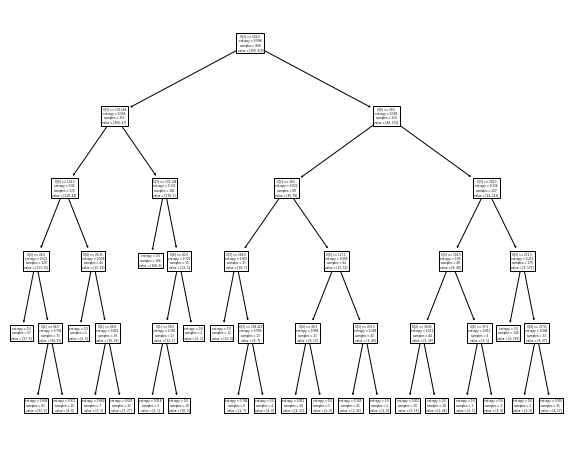

In [211]:


plt.figure(figsize=(10,8))
plot_tree(clf)
plt.show()




Search change the depth of tree to obtain a better classification

In [212]:
accuracies = list()
nro_feature = X_train.columns.size
depth_range = range(1, nro_feature+1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    tree_model = DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             random_state=0)
    tree_model.fit(X_train, y_train)
    accuracies.append(tree_model.score(X_test, y_test))
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.856502
         2          0.856502
         3          0.901345
         4          0.901345
         5          0.905830
         6          0.905830
         7          0.901345


Using GridSearchCV

In [213]:
max_features = range(1,X_train.columns.size+1)
criterion = ['gini', 'entropy']
max_depth = [2,3,4,5]
parameters = dict(max_features=max_features,
                      criterion=criterion,
                      max_depth=max_depth,
                      min_samples_split=[20,30],
                      min_samples_leaf=[5,10])

In [214]:
clf_GS = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters)
clf_GS.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5], 'max_features': range(1, 8),
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [20, 30]})

In [215]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', clf_GS.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['min_samples_leaf'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['max_features'])
clf_GS.best_estimator_.get_params()

Best Criterion: entropy
Best max_depth: 5
Best min_samples_split: 20
Best min_samples_leaf: 5
Best Number Of Components: 4


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [216]:
#Improve model of tree
tree_model = DecisionTreeClassifier(criterion='entropy',
                                    max_features=6,                                             
                                    min_samples_split=20,
                                    min_samples_leaf=10,
                                    max_depth = 4,
                                    random_state=0)
tree_model.fit(X_train, y_train)
print(f'Score:{tree_model.score(X_test, y_test)}')

# tree.feature_importances_ es un vector con la importancia estimada de cada atributo
for name, importance in zip(df_raw.columns[1:], tree_model.feature_importances_):
    print(name + ': ' + str(importance))

Score:0.8968609865470852
Glucose: 0.08902239291103327
BloodPressure: 0.0
SkinThickness: 0.0638798516471991
Insulin: 0.7716228046010913
BMI: 0.019920350252564233
DiabetesPedigreeFunction: 0.0
Age: 0.05555460058811201


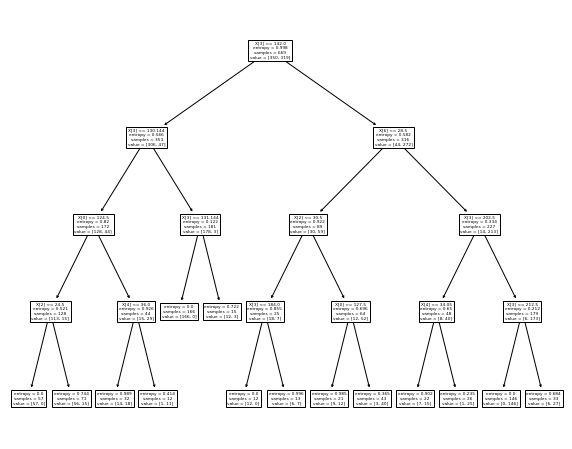

In [217]:
plt.figure(figsize=(10,8))
plot_tree(tree_model)
plt.show()